In [14]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import itertools
from collections import defaultdict

In [56]:
import torch
import sys
sys.path.append('rat-sql')
sys.path.append('../')

import attr
import _jsonnet
import json 

from ratsql.commands.infer import Inferer
import os

os.environ["CUDA_VISIBLE_DEVICES"]= "3"
os.environ['TF_ENABLE_ONEDNN_OPTS'] = "0"

os.chdir('/repo')

@attr.s
class InferConfig:
    config = attr.ib()
    config_args = attr.ib()
    logdir = attr.ib()
    section = attr.ib()
    beam_size = attr.ib()
    output = attr.ib()
    step = attr.ib()
    use_heuristic = attr.ib(default=False)
    mode = attr.ib(default="infer")
    limit = attr.ib(default=None)
    output_history = attr.ib(default=False)

infer_config = InferConfig(config='rat-sql/configs/spider/nl2code-bert.jsonnet', 
                            config_args='{"att": 1, "bert_lr": 3e-06, "bert_token_type": true, "bert_version": "bert-large-uncased-whole-word-masking", "bs": 12, "clause_order": null, "cv_link": true, "data_path": "rat-sql/data/spider/", "decoder_hidden_size": 512, "end_lr": 0, "end_with_from": true, "loss": "label_smooth", "lr": 0.000744, "max_steps": 121000, "num_batch_accumulated": 4, "num_layers": 8, "qv_link": false, "dist_relation": true, "sc_link": true, "summarize_header": "avg", "use_align_loss": true, "use_align_mat": true, "use_column_type": false}', 
                            logdir='rat-sql/logdir/bert_run', 
                            section='val',
                            beam_size=1, 
                            output='__LOGDIR__/ie_dirs/bert_run_true_1-step1.infer', 
                            step=1, use_heuristic=True, mode='infer', limit=None, output_history=False)

config = json.loads(_jsonnet.evaluate_file(infer_config.config, tla_codes={'args': infer_config.config_args}))

inferer = Inferer(config)

logdir = os.path.join(infer_config.logdir, config['model_name'])
step = 10100

model = inferer.load_model(logdir, step)

relation_k_emb_0 = model.state_dict()['encoder.encs_update.encoder.layers.0.relation_k_emb.weight'].cpu()
relation_k_emb_1 = model.state_dict()['encoder.encs_update.encoder.layers.1.relation_k_emb.weight'].cpu()
relation_k_emb_2 = model.state_dict()['encoder.encs_update.encoder.layers.2.relation_k_emb.weight'].cpu()
relation_k_emb_3 = model.state_dict()['encoder.encs_update.encoder.layers.3.relation_k_emb.weight'].cpu()
relation_k_emb_4 = model.state_dict()['encoder.encs_update.encoder.layers.4.relation_k_emb.weight'].cpu()
relation_k_emb_5 = model.state_dict()['encoder.encs_update.encoder.layers.5.relation_k_emb.weight'].cpu()
relation_k_emb_6 = model.state_dict()['encoder.encs_update.encoder.layers.6.relation_k_emb.weight'].cpu()
relation_k_emb_7 = model.state_dict()['encoder.encs_update.encoder.layers.7.relation_k_emb.weight'].cpu()

relation_ks = [relation_k_emb_0, relation_k_emb_1, relation_k_emb_2, relation_k_emb_3, relation_k_emb_4, relation_k_emb_5, relation_k_emb_6, relation_k_emb_7]

relation_v_emb_0 = model.state_dict()['encoder.encs_update.encoder.layers.0.relation_v_emb.weight'].cpu()
relation_v_emb_1 = model.state_dict()['encoder.encs_update.encoder.layers.1.relation_v_emb.weight'].cpu()
relation_v_emb_2 = model.state_dict()['encoder.encs_update.encoder.layers.2.relation_v_emb.weight'].cpu()
relation_v_emb_3 = model.state_dict()['encoder.encs_update.encoder.layers.3.relation_v_emb.weight'].cpu()
relation_v_emb_4 = model.state_dict()['encoder.encs_update.encoder.layers.4.relation_v_emb.weight'].cpu()
relation_v_emb_5 = model.state_dict()['encoder.encs_update.encoder.layers.5.relation_v_emb.weight'].cpu()
relation_v_emb_6 = model.state_dict()['encoder.encs_update.encoder.layers.6.relation_v_emb.weight'].cpu()
relation_v_emb_7 = model.state_dict()['encoder.encs_update.encoder.layers.7.relation_v_emb.weight'].cpu()

relation_vs = [relation_v_emb_0, relation_v_emb_1, relation_v_emb_2, relation_v_emb_3, relation_v_emb_4, relation_v_emb_5, relation_v_emb_6, relation_v_emb_7]

relation_index = {('qq_dist', -2): 0,
('qq_dist', -1): 1,
('qq_dist', 0): 2,
('qq_dist', 1): 3,
('qq_dist', 2): 4,
'qc_default': 5,
'qt_default': 6,
'cq_default': 7,
'cc_default': 8,
'cc_foreign_key_forward': 9,
'cc_foreign_key_backward': 10,
'cc_table_match': 11,
('cc_dist', -2): 12,
('cc_dist', -1): 13,
('cc_dist', 0): 14,
('cc_dist', 1): 15,
('cc_dist', 2): 16,
'ct_default': 17,
'ct_foreign_key': 18,
'ct_primary_key': 19,
'ct_table_match': 20,
'ct_any_table': 21,
'tq_default': 22,
'tc_default': 23,
'tc_primary_key': 24,
'tc_table_match': 25,
'tc_any_table': 26,
'tc_foreign_key': 27,
'tt_default': 28,
'tt_foreign_key_forward': 29,
'tt_foreign_key_backward': 30,
'tt_foreign_key_both': 31,
('tt_dist', -2): 32,
('tt_dist', -1): 33,
('tt_dist', 0): 34,
('tt_dist', 1): 35,
('tt_dist', 2): 36,
'qcCEM': 37,
'cqCEM': 38,
'qtTEM': 39,
'tqTEM': 40,
'qcCPM': 41,
'cqCPM': 42,
'qtTPM': 43,
'tqTPM': 44,
'qcNUMBER': 45,
'cqNUMBER': 46,
'qcTIME': 47,
'cqTIME': 48,
'qcCELLMATCH': 49,
'cqCELLMATCH': 50}

relation_index_list = list(relation_index.keys())


WARNING <class 'ratsql.models.enc_dec.EncDecModel.Preproc'>: superfluous {'name': 'EncDec'}
WARNING <class 'ratsql.models.enc_dec.EncDecModel'>: superfluous {'decoder_preproc': {'grammar': {'clause_order': None, 'end_with_from': True, 'factorize_sketch': 2, 'include_literals': False, 'infer_from_conditions': True, 'name': 'spider', 'output_from': True, 'use_table_pointer': True}, 'save_path': 'rat-sql/data/spider/nl2code,output_from=true,fs=2,emb=bert,cvlink', 'use_seq_elem_rules': True}, 'encoder_preproc': {'bert_version': 'bert-large-uncased-whole-word-masking', 'compute_cv_link': True, 'compute_sc_link': True, 'db_path': 'rat-sql/data/spider/database', 'fix_issue_16_primary_keys': True, 'include_table_name_in_column': False, 'save_path': 'rat-sql/data/spider/nl2code,output_from=true,fs=2,emb=bert,cvlink'}}


Used Relations: 51


Some weights of the model checkpoint at bert-large-uncased-whole-word-masking were not used when initializing BertModel: ['cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Exception: Attempting to infer on untrained model in rat-sql/logdir/bert_run/bs=12,lr=7.4e-04,bert_lr=3.0e-06,end_lr=0e0,att=1,loss=label_smooth,qv_link=false, step=10100

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import numpy as np

def cosine_distance_between_two_words(word1, word2):
    return (1- scipy.spatial.distance.cosine(word1, word2))

def calculate_heat_matrix_for_two_sentences(emb, relation_name):
    result_list = [[cosine_distance_between_two_words(word1, word2) for word2 in emb] for word1 in emb]
    result_df = pd.DataFrame(result_list)
    result_df.columns = relation_name
    result_df.index = relation_name
    return result_df

def cosine_distance_wordembedding_method(relation_emb):
    vector_1 = np.mean([word for word in relation_emb],axis=0)
    vector_2 = np.mean([word for word in relation_emb],axis=0)
    cosine = scipy.spatial.distance.cosine(vector_1, vector_2)
    print('Word Embedding method with a cosine distance asses that our two sentences are similar to',round((1-cosine)*100,2),'%')

def heat_map_matrix_between_two_sentences(s1,s2):
    df = calculate_heat_matrix_for_two_sentences(s1,s2)
    fig, ax = plt.subplots(figsize=(5,5)) 
    ax_blue = sns.heatmap(df, cmap="YlGnBu")
    print(cosine_distance_wordembedding_method(s1, s2))
    return ax_blue

In [35]:
relation_index

{('qq_dist', -2): 0,
 ('qq_dist', -1): 1,
 ('qq_dist', 0): 2,
 ('qq_dist', 1): 3,
 ('qq_dist', 2): 4,
 'qc_default': 5,
 'qt_default': 6,
 'cq_default': 7,
 'cc_default': 8,
 'cc_foreign_key_forward': 9,
 'cc_foreign_key_backward': 10,
 'cc_table_match': 11,
 ('cc_dist', -2): 12,
 ('cc_dist', -1): 13,
 ('cc_dist', 0): 14,
 ('cc_dist', 1): 15,
 ('cc_dist', 2): 16,
 'ct_default': 17,
 'ct_foreign_key': 18,
 'ct_primary_key': 19,
 'ct_table_match': 20,
 'ct_any_table': 21,
 'tq_default': 22,
 'tc_default': 23,
 'tc_primary_key': 24,
 'tc_table_match': 25,
 'tc_any_table': 26,
 'tc_foreign_key': 27,
 'tt_default': 28,
 'tt_foreign_key_forward': 29,
 'tt_foreign_key_backward': 30,
 'tt_foreign_key_both': 31,
 ('tt_dist', -2): 32,
 ('tt_dist', -1): 33,
 ('tt_dist', 0): 34,
 ('tt_dist', 1): 35,
 ('tt_dist', 2): 36,
 'qcCEM': 37,
 'cqCEM': 38,
 'qtTEM': 39,
 'tqTEM': 40,
 'qcCPM': 41,
 'cqCPM': 42,
 'qtTPM': 43,
 'tqTPM': 44,
 'qcNUMBER': 45,
 'cqNUMBER': 46,
 'qcTIME': 47,
 'cqTIME': 48,
 'qc

In [25]:
str(list(relation_index_list)[0])

"('qq_dist', -2)"

In [24]:
relation_index_list[0]

TypeError: 'dict_keys' object is not subscriptable

In [54]:
cosine_dict = defaultdict(lambda: {})

def cosine_similarity_relations(relation_matrix, length=5):
    for i in range(len(relation_matrix)):
        for j in range(len(relation_matrix)):
            base, target = relation_matrix[i], relation_matrix[j]
            
            cosine_dict[str(list(relation_index_list)[i])][relation_index_list[j]] = cosine_distance_between_two_words(base, target)
        # cosine_dict[str(list(relation_index_list)[i])] = sorted(cosine_dict[str(list(relation_index_list)[i])], key=lambda t:t[1])[:length]

    return cosine_dict

sim_score = cosine_similarity_relations(relation_k_emb_7)

In [55]:
for key in sim_score:
    target_dict = sim_score[key]
    target_dict = [(k,round(v, 2)) for k, v in sorted(target_dict.items(), key=lambda item: item[1], reverse=True)]

    sim_score[key] = target_dict[1:6]
    
    print(f'key {key} > {sim_score[key]}')


key ('qq_dist', -2) > [('ct_foreign_key', 0.16), ('tc_primary_key', 0.12), (('tt_dist', 0), 0.1), (('cc_dist', 0), 0.09), (('qq_dist', 1), 0.09)]
key ('qq_dist', -1) > [('ct_default', 0.17), (('cc_dist', 0), 0.12), (('cc_dist', -2), 0.11), ('qcCEM', 0.11), ('cq_default', 0.1)]
key ('qq_dist', 0) > [('tc_any_table', 0.3), ('cqNUMBER', 0.22), ('ct_default', 0.21), ('cq_default', 0.15), (('tt_dist', 0), 0.15)]
key ('qq_dist', 1) > [('tc_primary_key', 0.17), ('tqTEM', 0.14), (('tt_dist', 1), 0.14), ('qcNUMBER', 0.14), (('qq_dist', 0), 0.12)]
key ('qq_dist', 2) > [('tqTPM', 0.18), ('qt_default', 0.14), ('tqTEM', 0.13), ('qcCELLMATCH', 0.12), ('cc_table_match', 0.11)]
key qc_default > [('tqTPM', 0.13), ('tt_foreign_key_forward', 0.13), (('cc_dist', -1), 0.12), (('tt_dist', -2), 0.09), ('cc_default', 0.08)]
key qt_default > [(('cc_dist', 2), 0.24), ('tt_foreign_key_both', 0.15), (('qq_dist', 2), 0.14), (('qq_dist', 0), 0.13), ('cqCEM', 0.11)]
key cq_default > [('ct_default', 0.27), ('ct_prima

In [ ]:
def top5_similarity(emb_matrix):
    for 

In [10]:
first, second = relation_k_emb_7[0], relation_k_emb_7[1]

1- scipy.spatial.distance.cosine(first, second)

0.04645131155848503

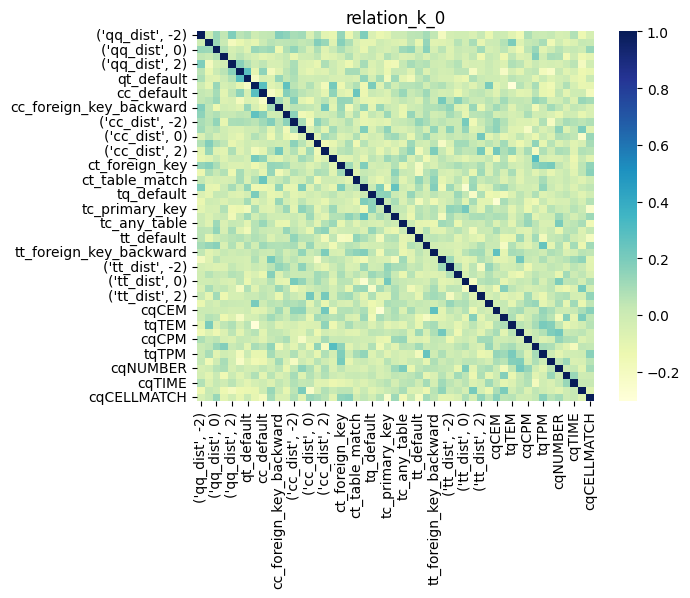

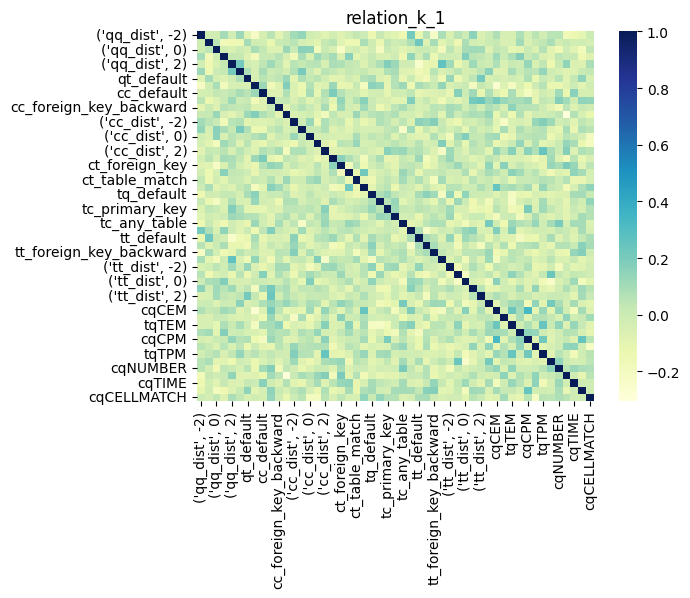

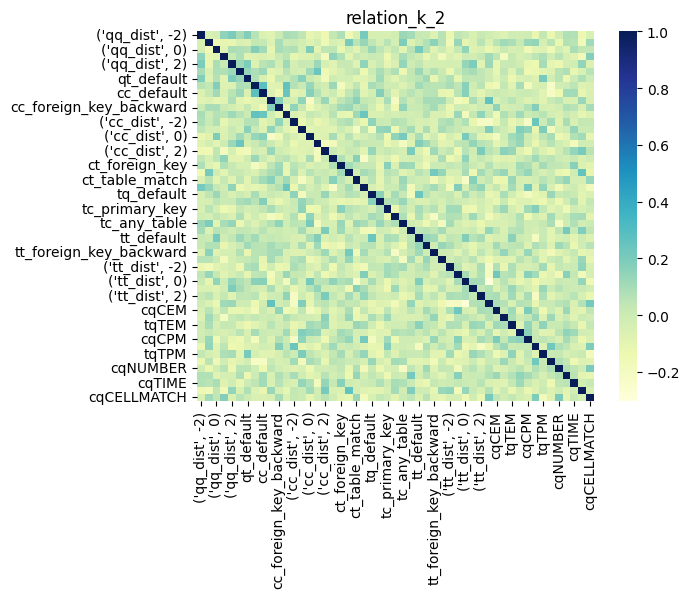

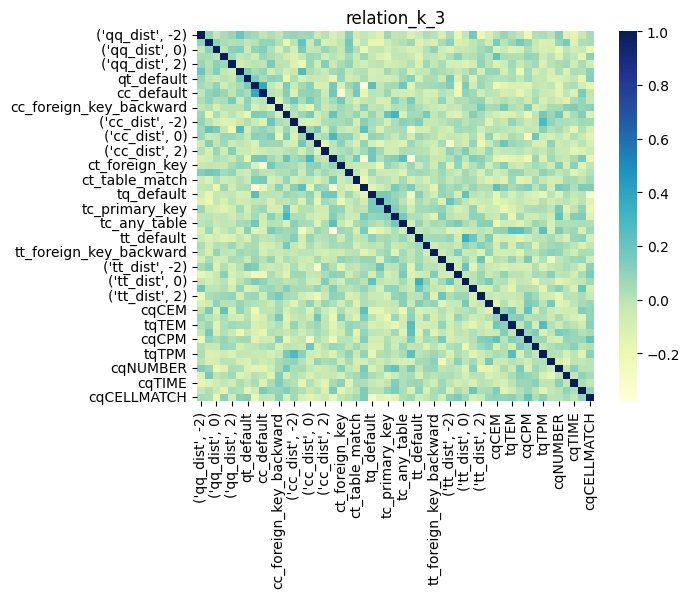

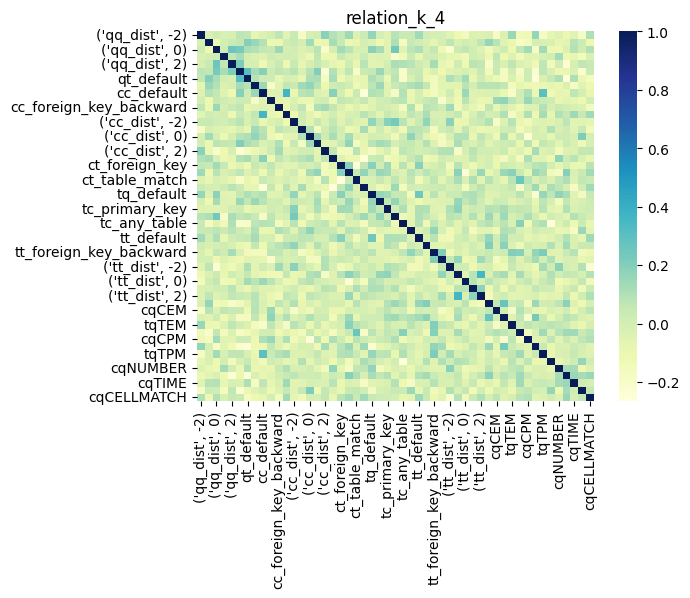

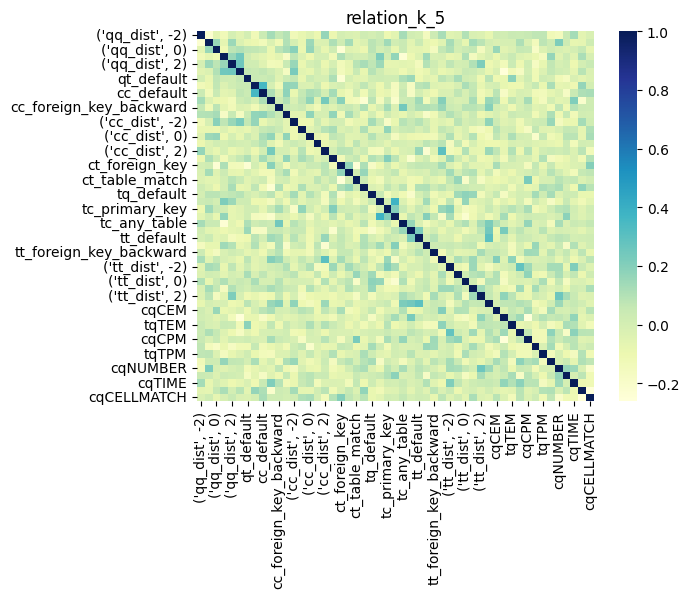

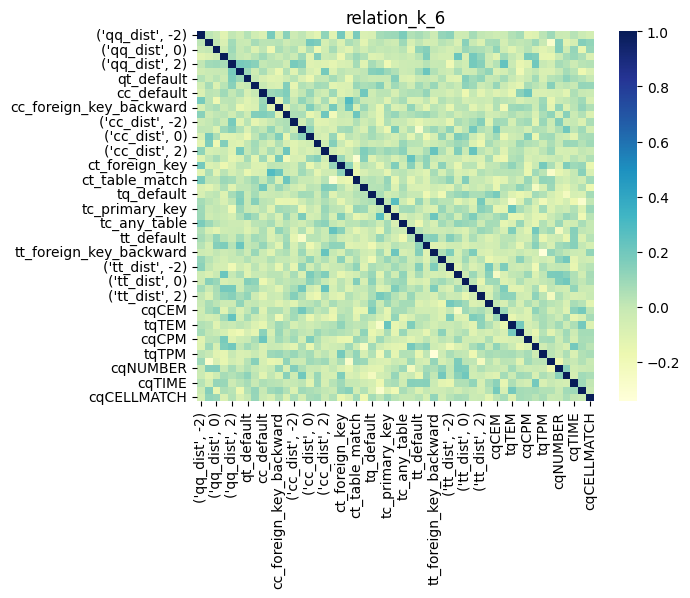

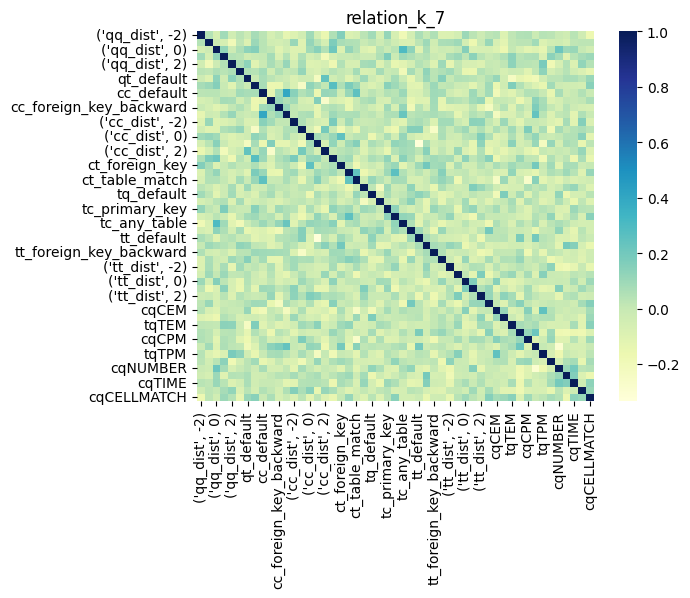

In [9]:
for i, relations in enumerate(relation_ks):
    df = calculate_heat_matrix_for_two_sentences(relations, relation_index_list)
    plt.figure()
    ax_blue = sns.heatmap(df, cmap='YlGnBu').set(title = f'relation_k_{i}')